<!-- vscode-jupyter-toc -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
<a id='toc0_'></a>**Table of contents**    
- [Gradient Descent from scratch](#toc1_1_)    
- [GD in Linear Regression](#toc1_2_)    
- [Stochastic Gradient Descent](#toc1_3_)    
- [Linear Regression – Analytical Approach](#toc1_4_)    
- [Linear Regression using `sklearn`](#toc1_5_)    
- [Measuring score of different approaches](#toc1_6_)    
- [Speed Test](#toc1_7_)    
- [Conclusion](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- /vscode-jupyter-toc -->

## <a id='toc1_1_'></a>[Gradient Descent from scratch](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn')

$f(x) = (x-5)^2$

In [2]:
X = np.arange(10)
Y = (X-5)**2 # a certain function that we want to minimize

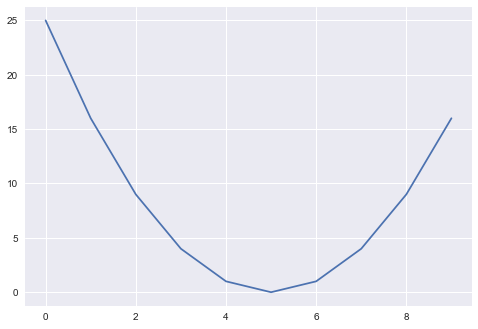

In [3]:
plt.plot(X, Y)
plt.show()

Gradient of $f(x)$:
$\nabla (x, y) = 2(x-5)$

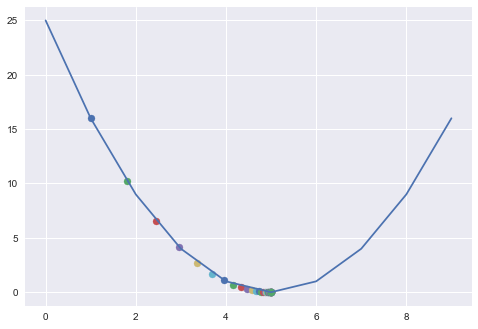

In [4]:
x = 0 # start
lr = 0.1 # learning rate
steps = 50 # number of iterations
errors = []

plt.plot(X, Y)

for _ in range(steps):
    grad = 2*(x-5) # gradient of the function Y
    x -= lr * grad # new X
    y = (x-5)**2 # y with nex X
    errors.append(y)
    plt.scatter(x, y)

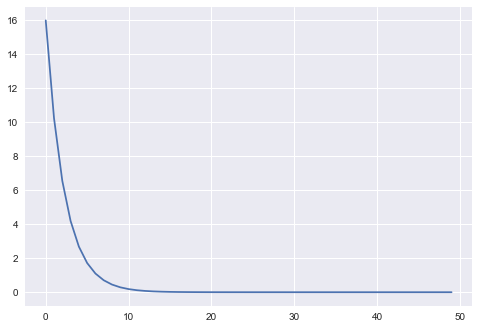

In [5]:
plt.plot(errors)

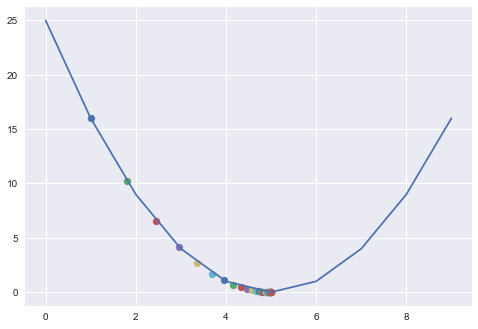

In [6]:
def gd(X, Y, gradient, orig_func, x: int, learn_rate=0.1, n_iter=50, tolerance=1e-05):
    """ 
    X: array of x-values
    Y: array of y-values
    orig_func: f(x)
    gradient: gradient of (X, Y)    
    """
    plt.plot(X, Y)

    for _ in range(n_iter):
        x -= learn_rate * gradient(x)
        y = orig_func(x)
        
        if y <= tolerance:
            break
        
        plt.scatter(x, y)

gd(X, Y, gradient=lambda x: 2*(x-5), x=0, orig_func=lambda x:(x-5)**2)

## <a id='toc1_2_'></a>[GD in Linear Regression](#toc0_)

$$ \hat{y} = m + bx $$

$$ MSE = \frac{1}{n} \sum_{1}^{n}{y_{i} - \hat{y}_{i}} = \frac{1}{n} \sum_{1}^{n}{y_{i} - (m + bx)}$$


Let's take partial derivatives with respect to $m$ and $b$. To derive a complex function we need to use Chain rule: $ F'(x) = f'(g(x)) * g'(x) $

$$ \frac{\partial f}{\partial m} = -2x \cdot g(x) = \frac{1}{n} \sum_{1}^{n} -2x_{i} \cdot (y_{i} - (mx_{i} + b))$$

$$ \frac{\partial f}{\partial b} = -2 \cdot g(x) = \frac{1}{n} \sum_{1}^{n} 2 \cdot (y_{i} - (mx_{i} + b))$$

Helper functions:

In [7]:
def MSE(y, y_pred):
    return mean_squared_error(y, y_pred)

# def MSE(y, y_pred):
#     """ Mean Sqaured Error """
#     return np.average((y-y_pred) ** 2)

def gradient_descent(X, y, lr, epoch, m=0.5, b=0.5, logging=True, tolerance=1e-3) -> Tuple[int, int, list, list]:
    """
    GD for Linear Regression (minimizing MSE)
    X: 1-d numpy-array
    y: 1-d numpy-array
    lr: int
    m: slope (0.5 as a start by default)
    b: slope (0.5 as a start by default)
    loggging: display changes of MSE
    tolerance: if cross tolerance level => break cycle 
    """
    params_history, mse_history = [], [] # lists to store learning process
    N = len(X) # number of samples
    
    prev_mse = 0
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
    
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        mse_res = MSE(y, (m*X + b))
        
        params_history.append((m, b))
        mse_history.append(mse_res)
        
        if tolerance:
            if abs(prev_mse - mse_res) >= tolerance:
                prev_mse = mse_res
                
                if logging:
                    print(f'Minimizing MSE with m = {m} b = {b} ---->', 'MSE =', mse_res)       

        else:
            
            if logging:
                print(f'Minimizing MSE with m = {m} b = {b} ---->', 'MSE =', mse_res)     
            break

    return m, b, params_history, mse_history

Loading of data

In [8]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

features = pd.DataFrame(data.data, columns=data.feature_names).astype(np.float32)
target = pd.DataFrame(data.target, columns=['Target']).astype(np.float32)

In [9]:
df = features.join(target) 
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.880001,-122.230003,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.860001,-122.220001,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.849998,-122.239998,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.849998,-122.250000,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.849998,-122.250000,3.422


In [10]:
df.describe().round(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,3.9,28.6,5.4,1.1,1425.5,3.1,35.6,-119.6,2.1
std,1.9,12.6,2.5,0.5,1132.5,10.4,2.1,2.0,1.2
min,0.5,1.0,0.8,0.3,3.0,0.7,32.5,-124.3,0.1
25%,2.6,18.0,4.4,1.0,787.0,2.4,33.9,-121.8,1.2
50%,3.5,29.0,5.2,1.0,1166.0,2.8,34.3,-118.5,1.8
75%,4.7,37.0,6.1,1.1,1725.0,3.3,37.7,-118.0,2.6
max,15.0,52.0,141.9,34.1,35682.0,1243.3,42.0,-114.3,5.0


Removing outliers

In [11]:
df = df[df.Target < 3.5]
df = df[df.MedInc < 8]

feature, target = df['MedInc'], df['Target']

In [12]:
df[['MedInc', 'Target']].describe()[1:]

,MedInc,Target
mean,3.482030,1.722805
std,1.364922,0.749957
min,0.499900,0.149990
25%,2.452025,1.119000
50%,3.303600,1.635000
75%,4.346050,2.256000
max,7.988700,3.499000


In [13]:
X = df.MedInc
y = df.Target

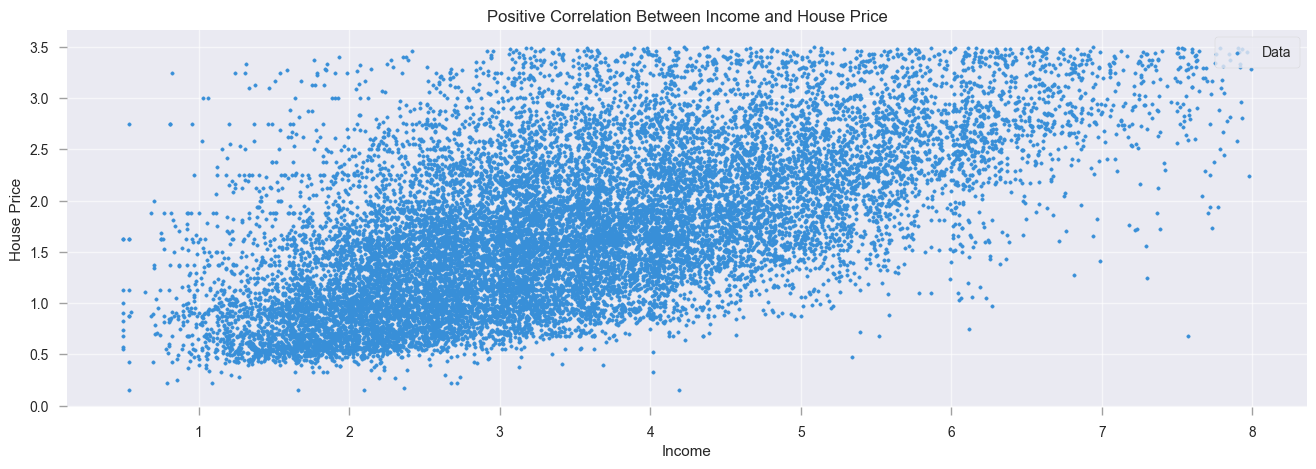

In [14]:
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(16,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Positive Correlation Between Income and House Price')
plt.xlabel('Income',)
plt.ylabel('House Price',)
plt.legend(frameon=True, loc=1, borderpad=.6)
plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
plt.show()

In [15]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(14,5))
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title)
    plt.xlabel('Income')
    plt.ylabel('Price')
    plt.legend(frameon=True, loc=1, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

Minimizing MSE with m = 0.45806292855948266 b = 0.48963581045650295 ----> MSE = 0.49877214
Minimizing MSE with m = 0.4285794755721095 b = 0.48239942789051177 ----> MSE = 0.4203053
Minimizing MSE with m = 0.40784792366414874 b = 0.47736101704917633 ----> MSE = 0.3815516
Minimizing MSE with m = 0.39326687975596497 b = 0.4738671338756237 ----> MSE = 0.36241102
Minimizing MSE with m = 0.3830081750770013 b = 0.4714585590819768 ----> MSE = 0.35295674
Minimizing MSE with m = 0.37578707028636826 b = 0.46981257844946833 ----> MSE = 0.34828618
Minimizing MSE with m = 0.3707006844103648 b = 0.46870239924714646 ----> MSE = 0.3459782
Minimizing MSE with m = 0.36711452702320135 b = 0.46796864302345237 ----> MSE = 0.3448371
Minimizing MSE with m = 0.36061755648742794 b = 0.4670007017307663 ----> MSE = 0.3437819


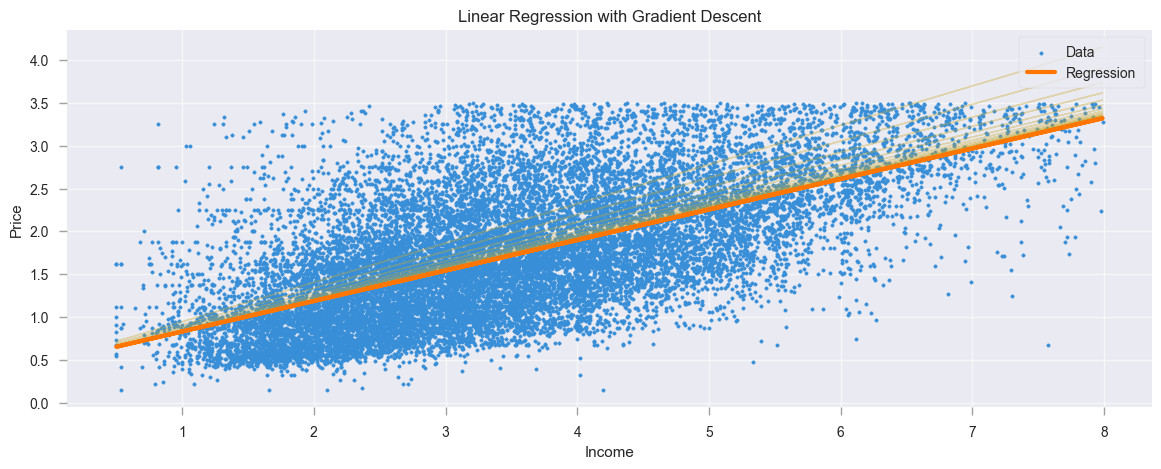

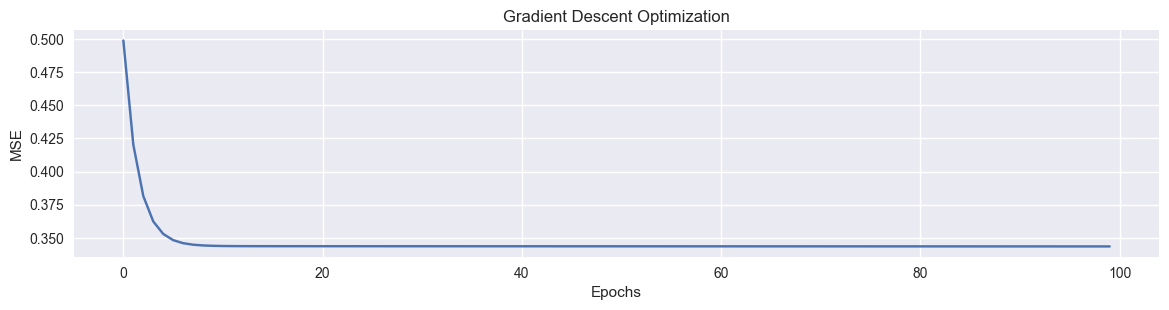

In [16]:
m_custom_gd, b_custom_gd, log, mse = gradient_descent(X, y, lr=0.01, epoch=100)

y_pred_custom = m_custom_gd * X + b_custom_gd
mse_result_custom_gd = MSE(y, y_pred_custom)

plot_regression(X, y, y_pred_custom, log=log, title="Linear Regression with Gradient Descent")

plt.figure(figsize=(14,3))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

## <a id='toc1_3_'></a>[Stochastic Gradient Descent](#toc0_)

The same thing as simple GD but instead it picks only one sample instead of the whole dataset for calculations.

In [17]:
def stochastic_gradient_descent(
    X, y, lr, epoch, batch_size, m=0.5, b=0.5, logging=True, tolerance=1e-3, random_seed=False
    ) -> Tuple[int, int, list, list]:
    """
    SGD for Linear Regression
    X: 1-d numpy-array
    y: 1-d numpy-array
    lr: learning rate (int)
    epoch: number of iterations (int)
    m: slope (0.5 as a start by default)
    b: slope (0.5 as a start by default)
    """
    
    if random_seed:
        np.random.seed(23)
    
    params_history, mse_history = [], [] # lists to store learning process
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        prev_mse = 0
                
        f = ys - (m*Xs + b)
    
        # Updating m and b
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        mse_res = MSE(y, (m*X + b))
        
        params_history.append((m, b))
        mse_history.append(mse_res)
        
        if tolerance:
            if abs(prev_mse - mse_res) >= tolerance:
                prev_mse = mse_res
                
                if logging:
                    print(f'Minimizing MSE with m = {m} b = {b} ---->', 'MSE =', mse_res)       

        else:
            
            if logging:
                print(f'Minimizing MSE with m = {m} b = {b} ---->', 'MSE =', mse_res)     
            break
    
    return m, b, params_history, mse_history

Minimizing MSE with m = 0.4282371044158936 b = 0.48392300128936766 ----> MSE = 0.4203635
Minimizing MSE with m = 0.43410316824913026 b = 0.48579266309738156 ----> MSE = 0.4340352
Minimizing MSE with m = 0.40832873940467834 b = 0.4719873988628387 ----> MSE = 0.3803893
Minimizing MSE with m = 0.4957310163974762 b = 0.5108328568935394 ----> MSE = 0.65102607
Minimizing MSE with m = 0.4453929579257965 b = 0.4970653712749481 ----> MSE = 0.46843806
Minimizing MSE with m = 0.3974219858646392 b = 0.4850726282596588 ----> MSE = 0.3700638
Minimizing MSE with m = 0.36135432124137873 b = 0.47608693718910217 ----> MSE = 0.3439641
Minimizing MSE with m = 0.40571676135063167 b = 0.48942140460014344 ----> MSE = 0.38268784
Minimizing MSE with m = 0.4316279590129852 b = 0.4949614179134369 ----> MSE = 0.43350902
Minimizing MSE with m = 0.43382024645805356 b = 0.4954928815364838 ----> MSE = 0.43880075
Minimizing MSE with m = 0.40783591628074645 b = 0.4898746478557587 ----> MSE = 0.38606176
Minimizing MSE w

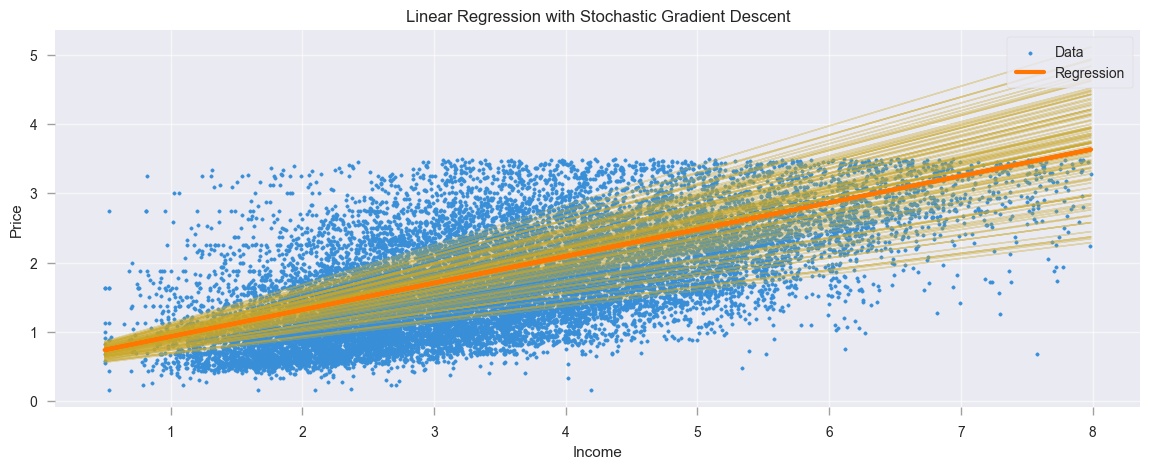

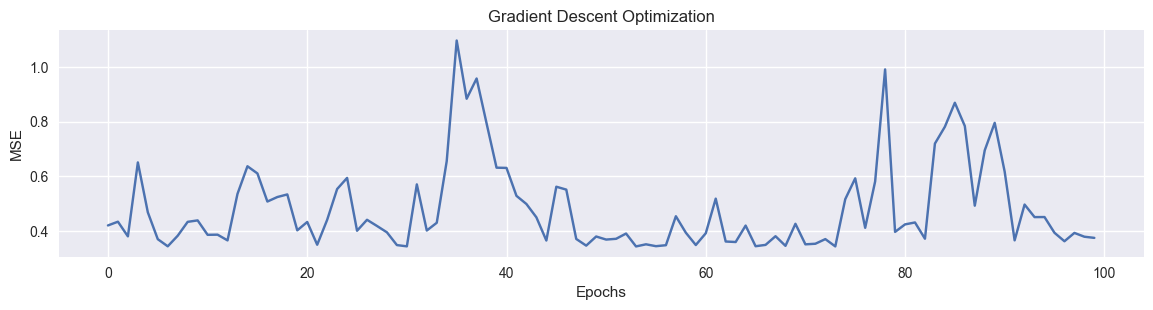

In [18]:
m_custom_sgd, b_custom_sgd, log, mse = stochastic_gradient_descent(X, y, lr=0.01, epoch=100, batch_size=1)

y_pred_custom_sgd = m_custom_sgd * X + b_custom_sgd
mse_result_custom_sgd = MSE(y, y_pred_custom_sgd)

plot_regression(X, y, y_pred_custom_sgd, log=log, title="Linear Regression with Stochastic Gradient Descent")

plt.figure(figsize=(14,3))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

## <a id='toc1_4_'></a>[Linear Regression – Analytical Approach](#toc0_)

In [19]:
class LinearRegressionCustom:
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
        self.b = np.mean(y) - self.m * np.mean(X)
    
    def coeffs(self):
        return self.m, self.b

In [20]:
lr_custom = LinearRegressionCustom()
lr_custom.fit(X, y)
m_custom, b_custom = lr_custom.coeffs()
mse_result_custom_lr = MSE(y, (m_custom * X + b_custom))

## <a id='toc1_5_'></a>[Linear Regression using `sklearn`](#toc0_)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

lr_sk_ls = LinearRegression() # least squares
lr_sk_sgd = SGDRegressor() # SGD

X_transformed = X.to_numpy().reshape(-1, 1)

lr_sk_ls.fit(X_transformed, y)
lr_sk_sgd.fit(X_transformed, y)

b_sk_ls = lr_sk_ls.intercept_
m_sk_ls = lr_sk_ls.coef_[0]

b_sk_sgd = lr_sk_sgd.intercept_
m_sk_sgd = lr_sk_sgd.coef_[0]

mse_result_sk_ls =  MSE(y, (m_sk_ls * X + b_sk_sgd))
mse_result_sk_sgd =  MSE(y, (m_sk_sgd * X + b_sk_sgd))

## <a id='toc1_6_'></a>[Measuring score of different approaches](#toc0_)

In [22]:
print("MSE using sklearn analytical:", mse_result_sk_ls.round(4))
print("MSE using sklearn SGD:", mse_result_sk_sgd.round(4))
print("MSE using custom analytical:", mse_result_custom_lr.round(4))
print("MSE using custom GD:", mse_result_custom_gd.round(4))
print("MSE using custom SGD:", mse_result_custom_sgd.round(4))

MSE using sklearn analytical: 0.3432
MSE using sklearn SGD: 0.3433
MSE using custom analytical: 0.3432
MSE using custom GD: 0.3435
MSE using custom SGD: 0.3748


## <a id='toc1_7_'></a>[Speed Test](#toc0_)

All algos will work faster using numpy arrays rather than pandas data dataframes. If it is possible, it is recommended to use more effective types rather than `np.float64` but that just for an experiment.

In [23]:
X, y = X.to_numpy().astype(np.float64), y.to_numpy().astype(np.float64)

Custom Gradient Descent WITHOUT `tolerance` parameter:

In [24]:
%timeit gradient_descent(X, y, lr=0.01, epoch=10000, logging=False, tolerance=None)

98 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Custom Stochastic Gradient Descent WITHOUT `tolerance` parameter:

In [25]:
%timeit stochastic_gradient_descent(X, y, lr=0.01, epoch=10000, batch_size=1, logging=False, tolerance=None)

82.7 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Custom Gradient Descent WITH `tolerance` parameter:

In [26]:
%timeit gradient_descent(X, y, lr=0.01, epoch=10000, logging=False, tolerance=1e-2)

964 ms ± 6.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Custom Stochastic Gradient Descent WITH `tolerance` parameter:

In [27]:
%timeit stochastic_gradient_descent(X, y, lr=0.01, epoch=10000, batch_size=1, logging=False, tolerance=1e-2)

797 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Custom analytical solution:

In [28]:
%timeit lr_custom.fit(X, y)

54.1 µs ± 880 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Analytical `sklearn` solution to Linear Regression:

In [29]:
%timeit lr_sk_ls.fit(X_transformed, y)

236 µs ± 4.64 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


SGD `sklearn`:

In [30]:
%timeit lr_sk_sgd.fit(X_transformed, y)

3.43 ms ± 54 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## <a id='toc1_8_'></a>[Conclusion](#toc0_)

- `SGD` is faster when it comes to large amount of iterations, and when we use `np.float64+` data. In other conditions, when `n_iter` is <= 10000 and we do not need to check for tolerance.
- It may seem that tolerance parameter "sucks" (losing 10x on `n_iter`=10k) and we should not use it, but in fact we most likely will miss a "good" spot of our loss function. 
- Math (almost) always work the best. Analytical solution is a few times faster than iterative algorithms and probably on larger datasets and larger `n_iter` it will perform better

Reference: https://github.com/arseniyturin/SGD-From-Scratch/blob/master/Gradient%20Descent.ipynb